In [158]:
import os
import json
import pickle
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

###Create Bar Plot of Frequency of Term "Charity" by Subreddit for 10 Year Period

In [66]:
with open('term_charity_by_subreddit.json') as json_file:
    data = json.load(json_file)

#Create a list to add dictionaries from JSON
#to feed into pandas dataframe
list_of_json_dicts_charity = []

for item in data["aggs"]["subreddit"]:
    list_of_json_dicts_charity.append(item)

In [67]:
df = pd.DataFrame(list_of_json_dicts_charity)   
df.columns = ['Frequency', 'Subreddit']

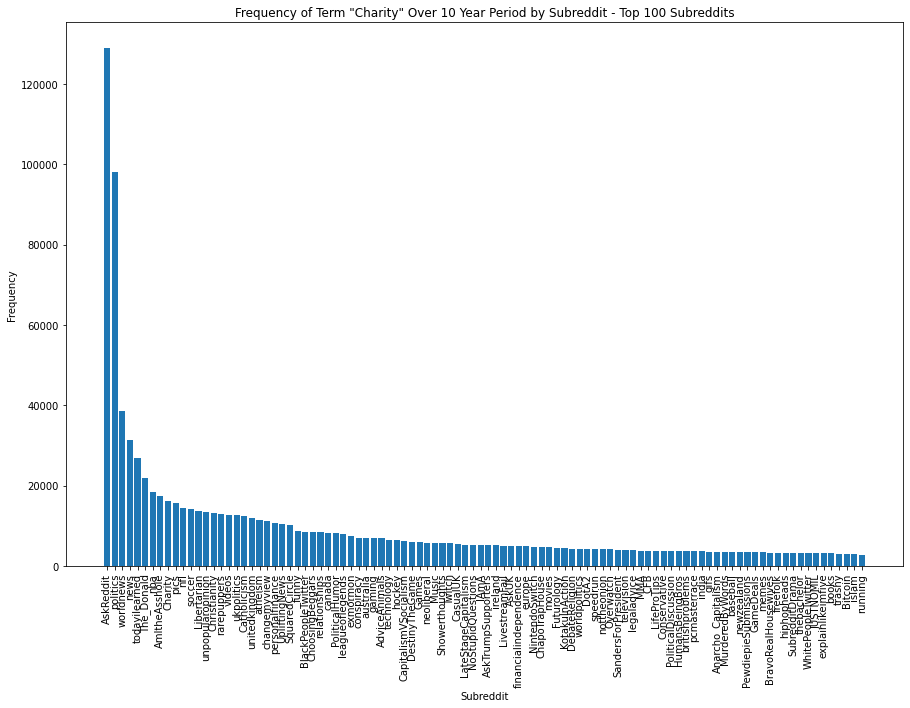

In [68]:
plt.bar(df["Subreddit"], df["Frequency"])
plt.xlabel("Subreddit"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Charity_By_Subreddit_10yrs_Top100.png', dpi=100)

ax = plt.gca()
ax.set_title('Frequency of Term "Charity" Over 10 Year Period by Subreddit - Top 100 Subreddits')
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()

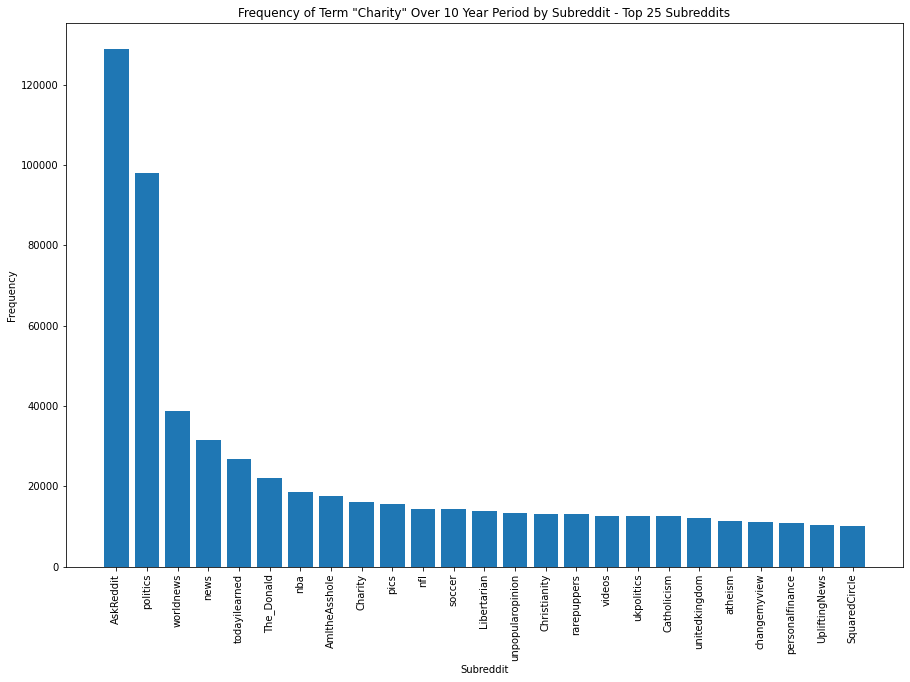

In [69]:
plt.bar(df["Subreddit"][:25], df["Frequency"][:25])
plt.xlabel("Subreddit"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Charity_By_Subreddit_10yrs_Top25.png', dpi=100)

ax = plt.gca()
ax.set_title('Frequency of Term "Charity" Over 10 Year Period by Subreddit - Top 25 Subreddits')
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()

In [70]:
###Create Bar Plot of Frequency of Term "Donate/Donation" by Subreddit for 10 Year Period
with open('term_donate_donation_by_subreddit.json') as json_file:
    data = json.load(json_file)

#Create a list to add dictionaries from JSON
#to feed into pandas dataframe
list_of_json_dicts_donation = []

for item in data["aggs"]["subreddit"]:
    list_of_json_dicts_donation.append(item)

In [71]:
df = pd.DataFrame(list_of_json_dicts_donation)   
df.columns = ['Frequency', 'Subreddit']

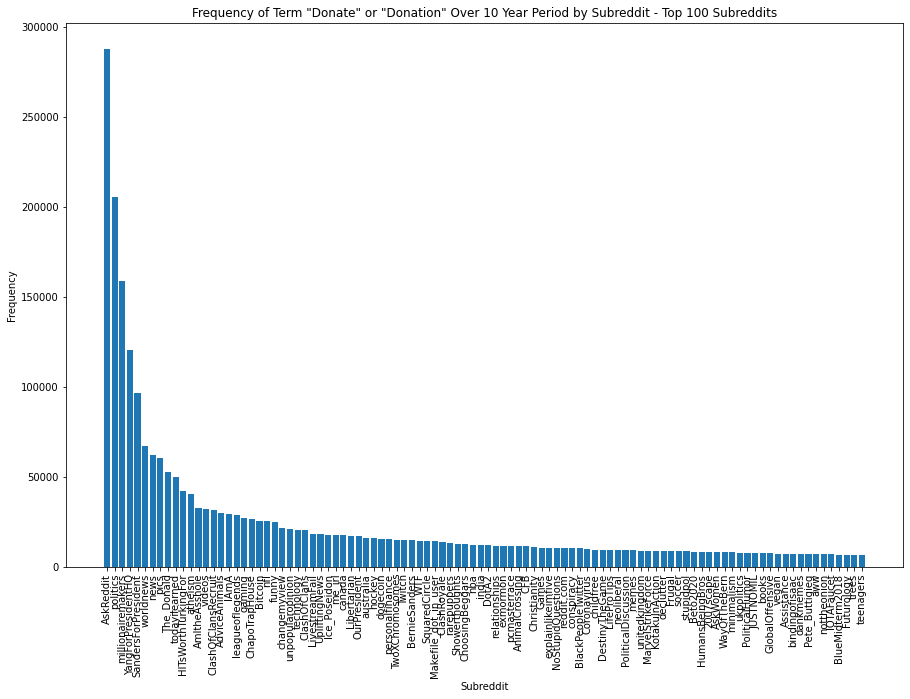

In [72]:
plt.bar(df["Subreddit"], df["Frequency"])
plt.xlabel("Subreddit"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Donation_By_Subreddit_10yrs_Top100.png', dpi=100)

ax = plt.gca()
ax.set_title('Frequency of Term "Donate" or "Donation" Over 10 Year Period by Subreddit - Top 100 Subreddits')
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()

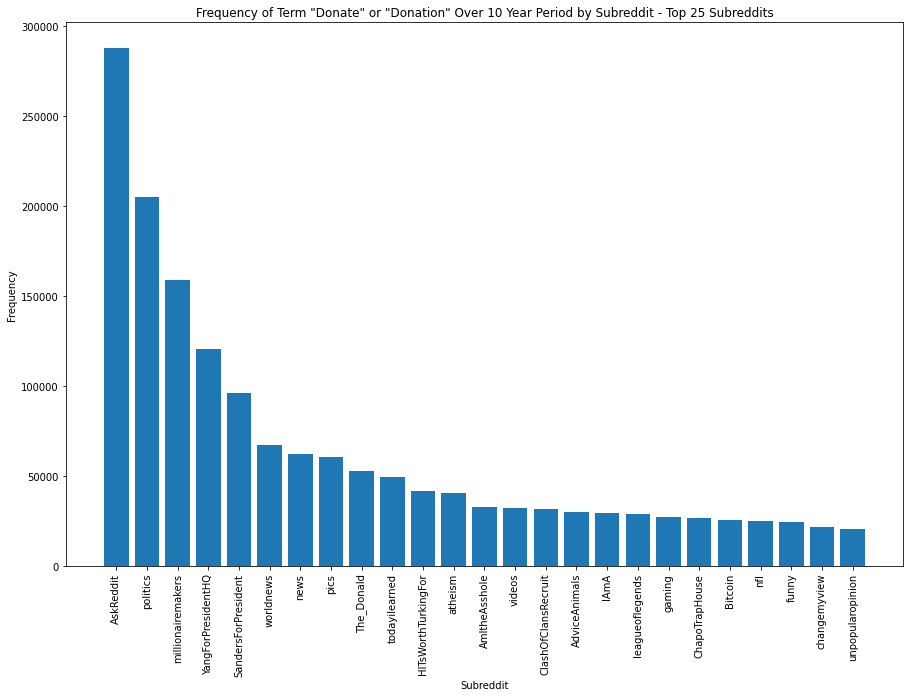

In [73]:
plt.bar(df["Subreddit"][:25], df["Frequency"][:25])
plt.xlabel("Subreddit"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Donation_By_Subreddit_10yrs_Top25.png', dpi=100)

ax = plt.gca()
ax.set_title('Frequency of Term "Donate" or "Donation" Over 10 Year Period by Subreddit - Top 25 Subreddits')
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()

###Plot How Term "Charity" Fluctuates Over the Year - 2018

In [74]:
with open('charity_by_month.json') as json_file:
    data = json.load(json_file)

#Create a list to add dictionaries from JSON
#to feed into pandas dataframe
list_of_json_dicts_charity_month = []

for item in data["aggs"]["created_utc"]:
    list_of_json_dicts_charity_month.append(item)

In [75]:
df = pd.DataFrame(list_of_json_dicts_charity_month)   
df.columns = ['Count', 'Month']

In [78]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["Months"] = months

df.drop(df.columns[1], axis=1, inplace = True)

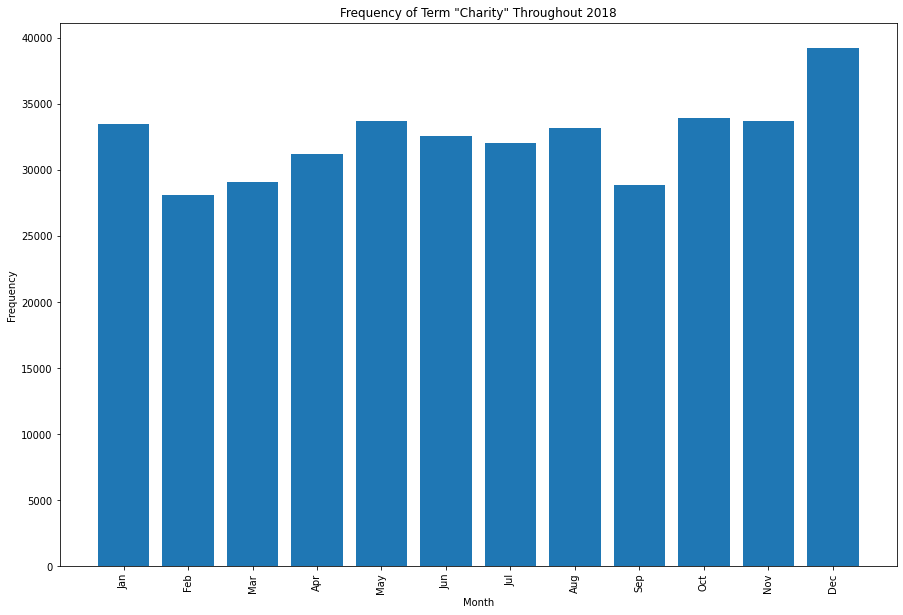

In [77]:
plt.bar(df["Months"],df["Count"])
plt.xlabel("Month"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Charity_Fluctuations_2018.png', dpi=100)

ax = plt.gca()
ax.set_title('Frequency of Term "Charity" Throughout 2018')
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()

###Plot Keywords ("Charity", "Donate", "Donation") for Subreddits Adjusted by Total Number of Comments (550,877,726) ###in Subreddit
###Keyword Extraction Can Be Found in Extracter Notebook

In [108]:
directory = "/KeywordOccurrenceBySubreddit/"

combinedCounter = Counter({})
for filename in os.listdir(directory):
    #Unpack Dictionary Pickles Created in Extracter Notebook 
    if filename.endswith(".pickle"):
        
        with open(os.path.join(directory, filename),'rb') as f:
            var = pickle.load(f)
        
        varAsCounter = Counter(var)
        combinedCounter += Counter(var)
                
combinedKeywordOccurrenceBySub = dict(combinedCounter)        

In [110]:
directory = "/TotalNumberofCommentsBySubreddit/"

combinedCounter = Counter({})
for filename in os.listdir(directory):
    #Unpack Dictionary Pickles Created in Extracter Notebook 
    if filename.endswith(".pickle"):
        
        with open(os.path.join(directory, filename),'rb') as f:
            var = pickle.load(f)
        
        varAsCounter = Counter(var)
        combinedCounter += Counter(var)
                
combinedTotalCommentsBySub = dict(combinedCounter)  

In [154]:
percentList = []

combinedKeywordOccurrenceBySub #keywoards per subbreddit
combinedTotalCommentsBySub #total
#sort_orders = sorted(resultDict.items(), key=lambda x: x[1], reverse=True)
#sort_orders

for key, value in combinedKeywordOccurrenceBySub.items():
    #The API feeds user scores which are designated with the string "u_", below removes these entries
    #As well as any subreddit where total comments is below 30k. This is an arbitrary threshold
    if key[:2] == "u_" or combinedTotalCommentsBySub[key] < 30000: 
        pass
    else:
        percentList.append([value/combinedTotalCommentsBySub[key]*100, key, value, combinedTotalCommentsBySub[key]])

In [172]:
df = pd.DataFrame(percentList, columns= ['Keyword Occurrence %', 'Subreddit','Keyword Total', 'Total Comments'])  
df.sort_values(by=['Keyword Occurrence %'], inplace=True, ascending=False)
df.reset_index(drop=True, inplace=True)
df.head(25)

,Keyword Occurrence %,Subreddit,Keyword Total,Total Comments
0,3.344180,speedrun,2487,74368
1,2.748611,minimalism,1123,40857
2,2.343915,Twitch,4207,179486
3,2.237011,SouthParkPhone,2242,100223
4,2.127660,vertcoin,712,33464
5,2.071441,Political_Revolution,929,44848
6,1.696359,tezos,657,38730
7,1.585722,ClashOfClans,1928,121585
8,1.505306,Assistance,505,33548
9,1.224495,UpliftingNews,3575,291957


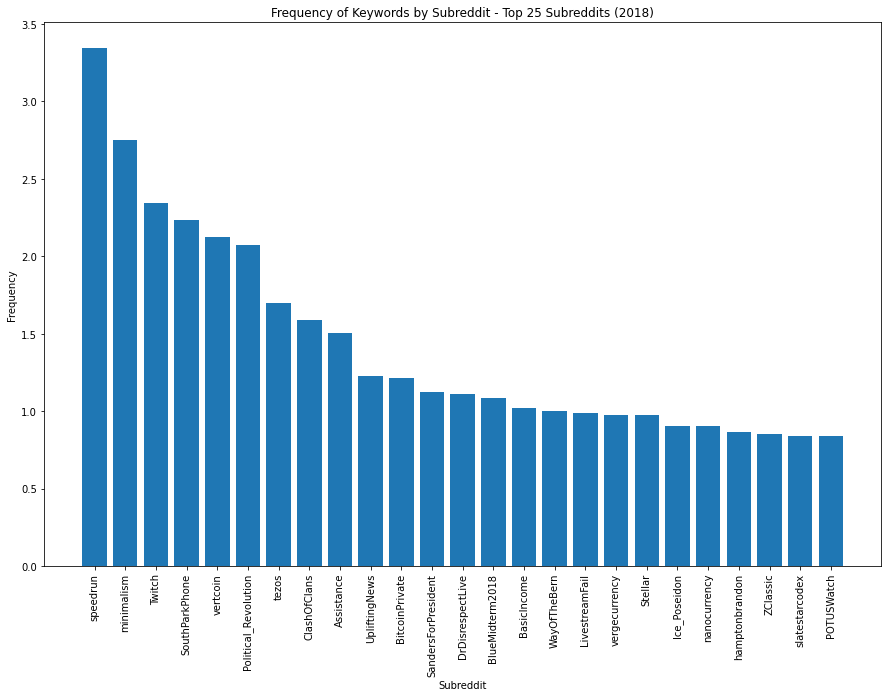

In [165]:
plt.bar(df["Subreddit"][:25], df["Keyword Occurrence %"][:25])
plt.xlabel("Subreddit"), plt.ylabel("Frequency")
plt.xticks(rotation=90)

fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.savefig('Keyword_By_Subreddit_2018_Top25_Adjusted_By_Total_Comments.png', dpi=100)

ax = plt.gca()
ax.set_title("Frequency of Keywords by Subreddit - Top 25 Subreddits (2018)")
#Option to remove labels altogether
#ax.axes.xaxis.set_ticks([])

plt.show()